# Introduction to Machine Learning with the Iris Dataset

## Overview
This notebook provides a comprehensive introduction to machine learning using the classic Iris dataset. We'll explore data visualization, implement multiple classification algorithms, and evaluate their performance using various metrics.

## Table of Contents
1. [Data Loading and Exploration](#data-loading)
2. [Data Visualization](#visualization)
3. [Data Preprocessing](#preprocessing)
4. [Machine Learning Models](#models)
5. [Model Evaluation](#evaluation)
6. [Conclusions](#conclusions)

---

## 1. Data Loading and Exploration

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (classification_report, confusion_matrix, 
                           accuracy_score, roc_curve, auc, roc_auc_score)
from sklearn.preprocessing import label_binarize
import warnings
warnings.filterwarnings('ignore')

# Set style for better plots
plt.style.use('seaborn-v0_8')
sns.set_palette('husl')

print('Libraries imported successfully!')

Libraries imported successfully!


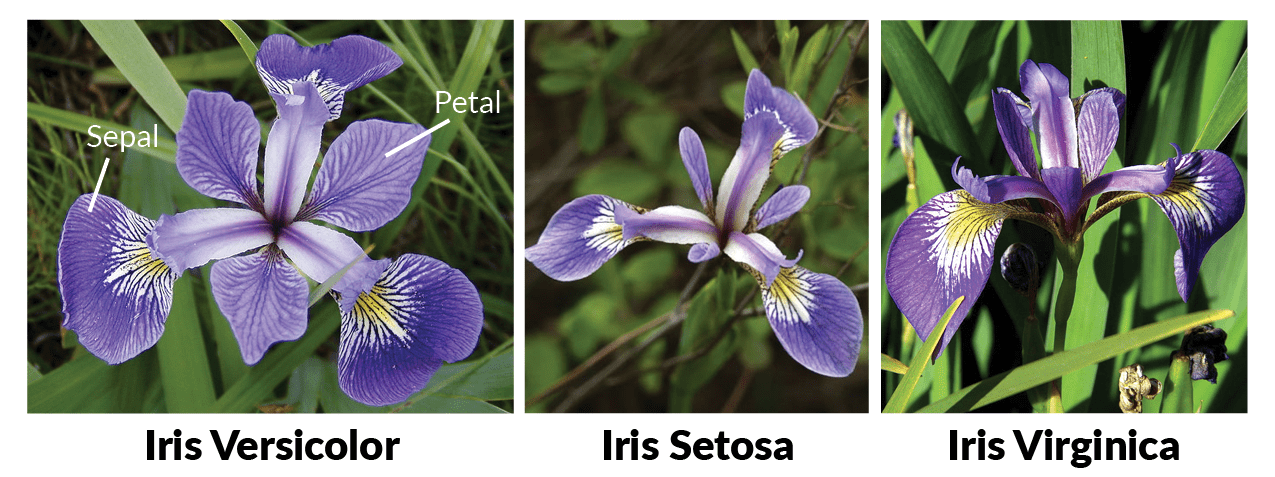

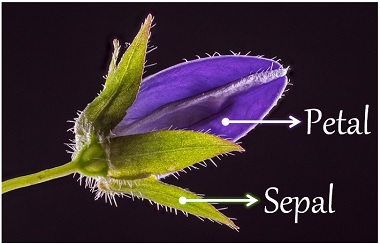

In [3]:
# Load the dataset
df = pd.read_csv('Iris.csv')

# Display basic information about the dataset
print('Dataset Shape:', df.shape)
print('\nFirst 5 rows:')
print(df.head())

Dataset Shape: (150, 6)

First 5 rows:
   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


In [6]:
print('\nStatistical Summary:')
print(df.describe())

print('\nSpecies Distribution:')
print(df['Species'].value_counts())

print('\nMissing Values:')
print(df.isnull().sum())


Statistical Summary:
               Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  150.000000     150.000000    150.000000     150.000000    150.000000
mean    75.500000       5.843333      3.054000       3.758667      1.198667
std     43.445368       0.828066      0.433594       1.764420      0.763161
min      1.000000       4.300000      2.000000       1.000000      0.100000
25%     38.250000       5.100000      2.800000       1.600000      0.300000
50%     75.500000       5.800000      3.000000       4.350000      1.300000
75%    112.750000       6.400000      3.300000       5.100000      1.800000
max    150.000000       7.900000      4.400000       6.900000      2.500000

Species Distribution:
Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

Missing Values:
Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64


---
## 2. Data Visualization

### 2.1 Distribution Analysis

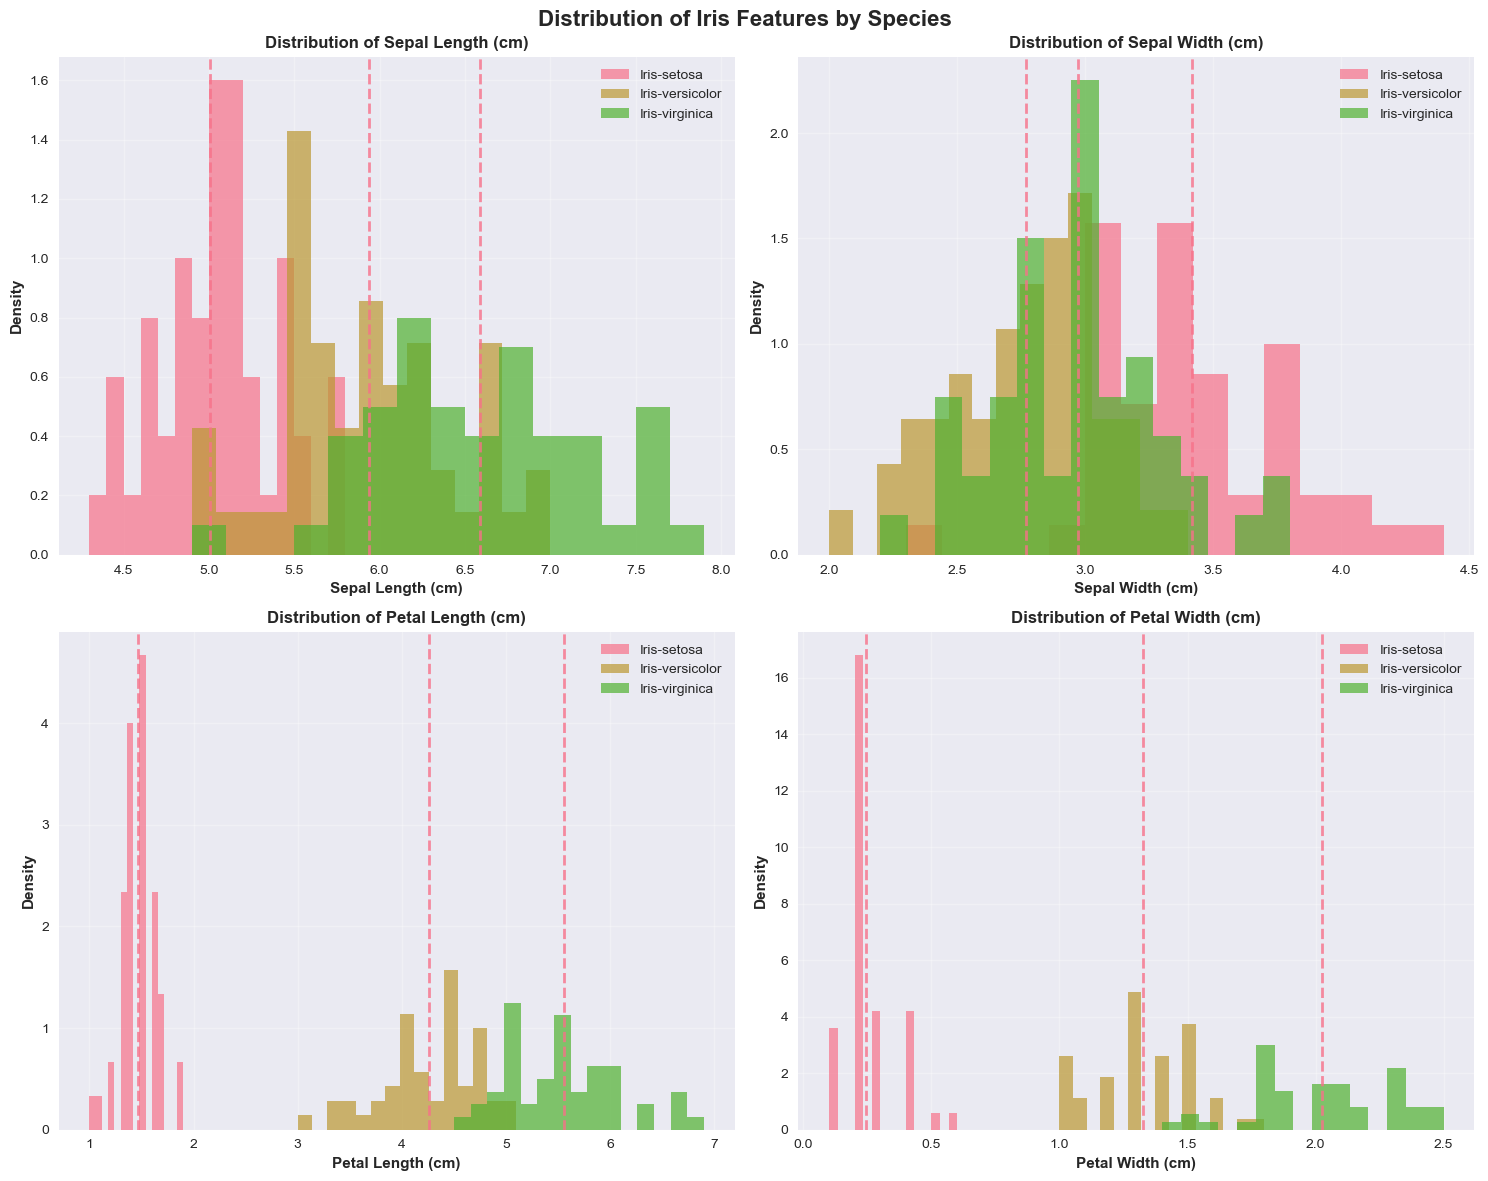

In [5]:
# Create figure for distribution plots
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Distribution of Iris Features by Species', fontsize=16, fontweight='bold')

features = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
feature_names = ['Sepal Length (cm)', 'Sepal Width (cm)', 'Petal Length (cm)', 'Petal Width (cm)']

for i, (feature, name) in enumerate(zip(features, feature_names)):
    row = i // 2
    col = i % 2
    
    # Create histogram with density curves
    for species in df['Species'].unique():
        data = df[df['Species'] == species][feature]
        axes[row, col].hist(data, alpha=0.7, label=species, bins=15, density=True)
        axes[row, col].axvline(data.mean(), linestyle='--', alpha=0.8, linewidth=2)
    
    axes[row, col].set_xlabel(name, fontweight='bold')
    axes[row, col].set_ylabel('Density', fontweight='bold')
    axes[row, col].set_title(f'Distribution of {name}', fontweight='bold')
    axes[row, col].legend()
    axes[row, col].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### 2.2 Box Plots for Species Comparison

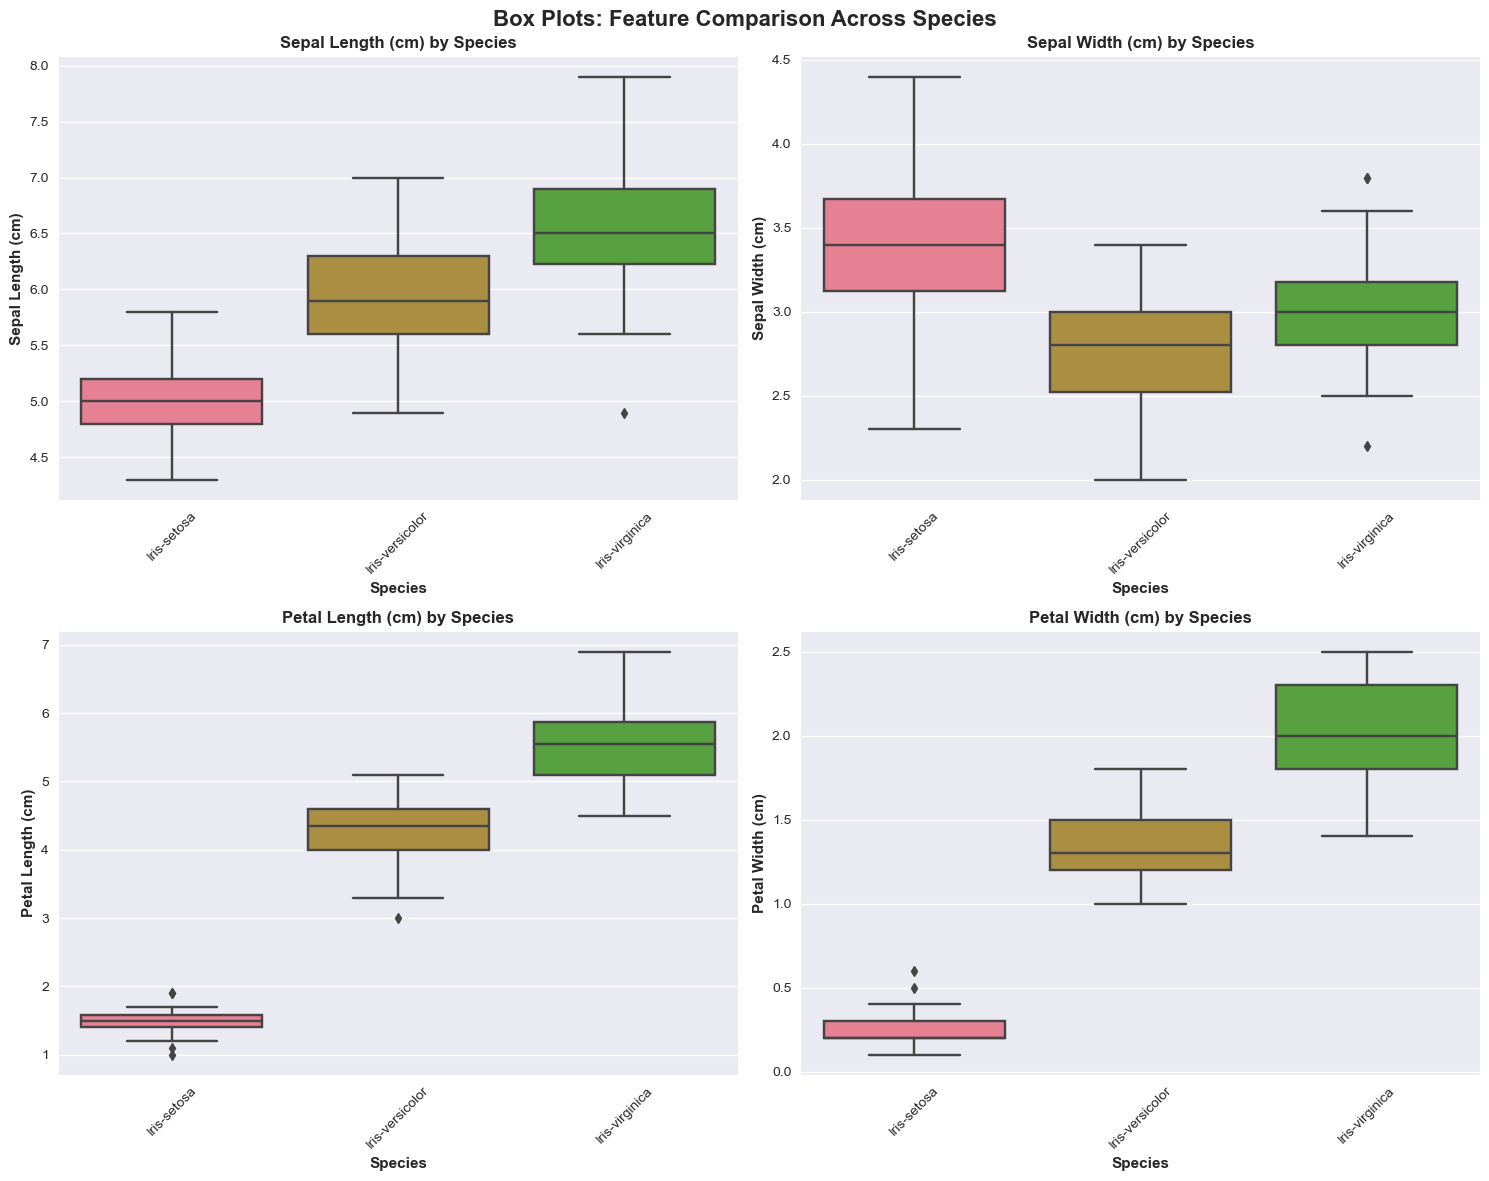

In [7]:
# Create box plots
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Box Plots: Feature Comparison Across Species', fontsize=16, fontweight='bold')

for i, (feature, name) in enumerate(zip(features, feature_names)):
    row = i // 2
    col = i % 2
    
    sns.boxplot(data=df, x='Species', y=feature, ax=axes[row, col])
    axes[row, col].set_title(f'{name} by Species', fontweight='bold')
    axes[row, col].set_xlabel('Species', fontweight='bold')
    axes[row, col].set_ylabel(name, fontweight='bold')
    axes[row, col].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

### 2.3 Pairwise Scatter Plots

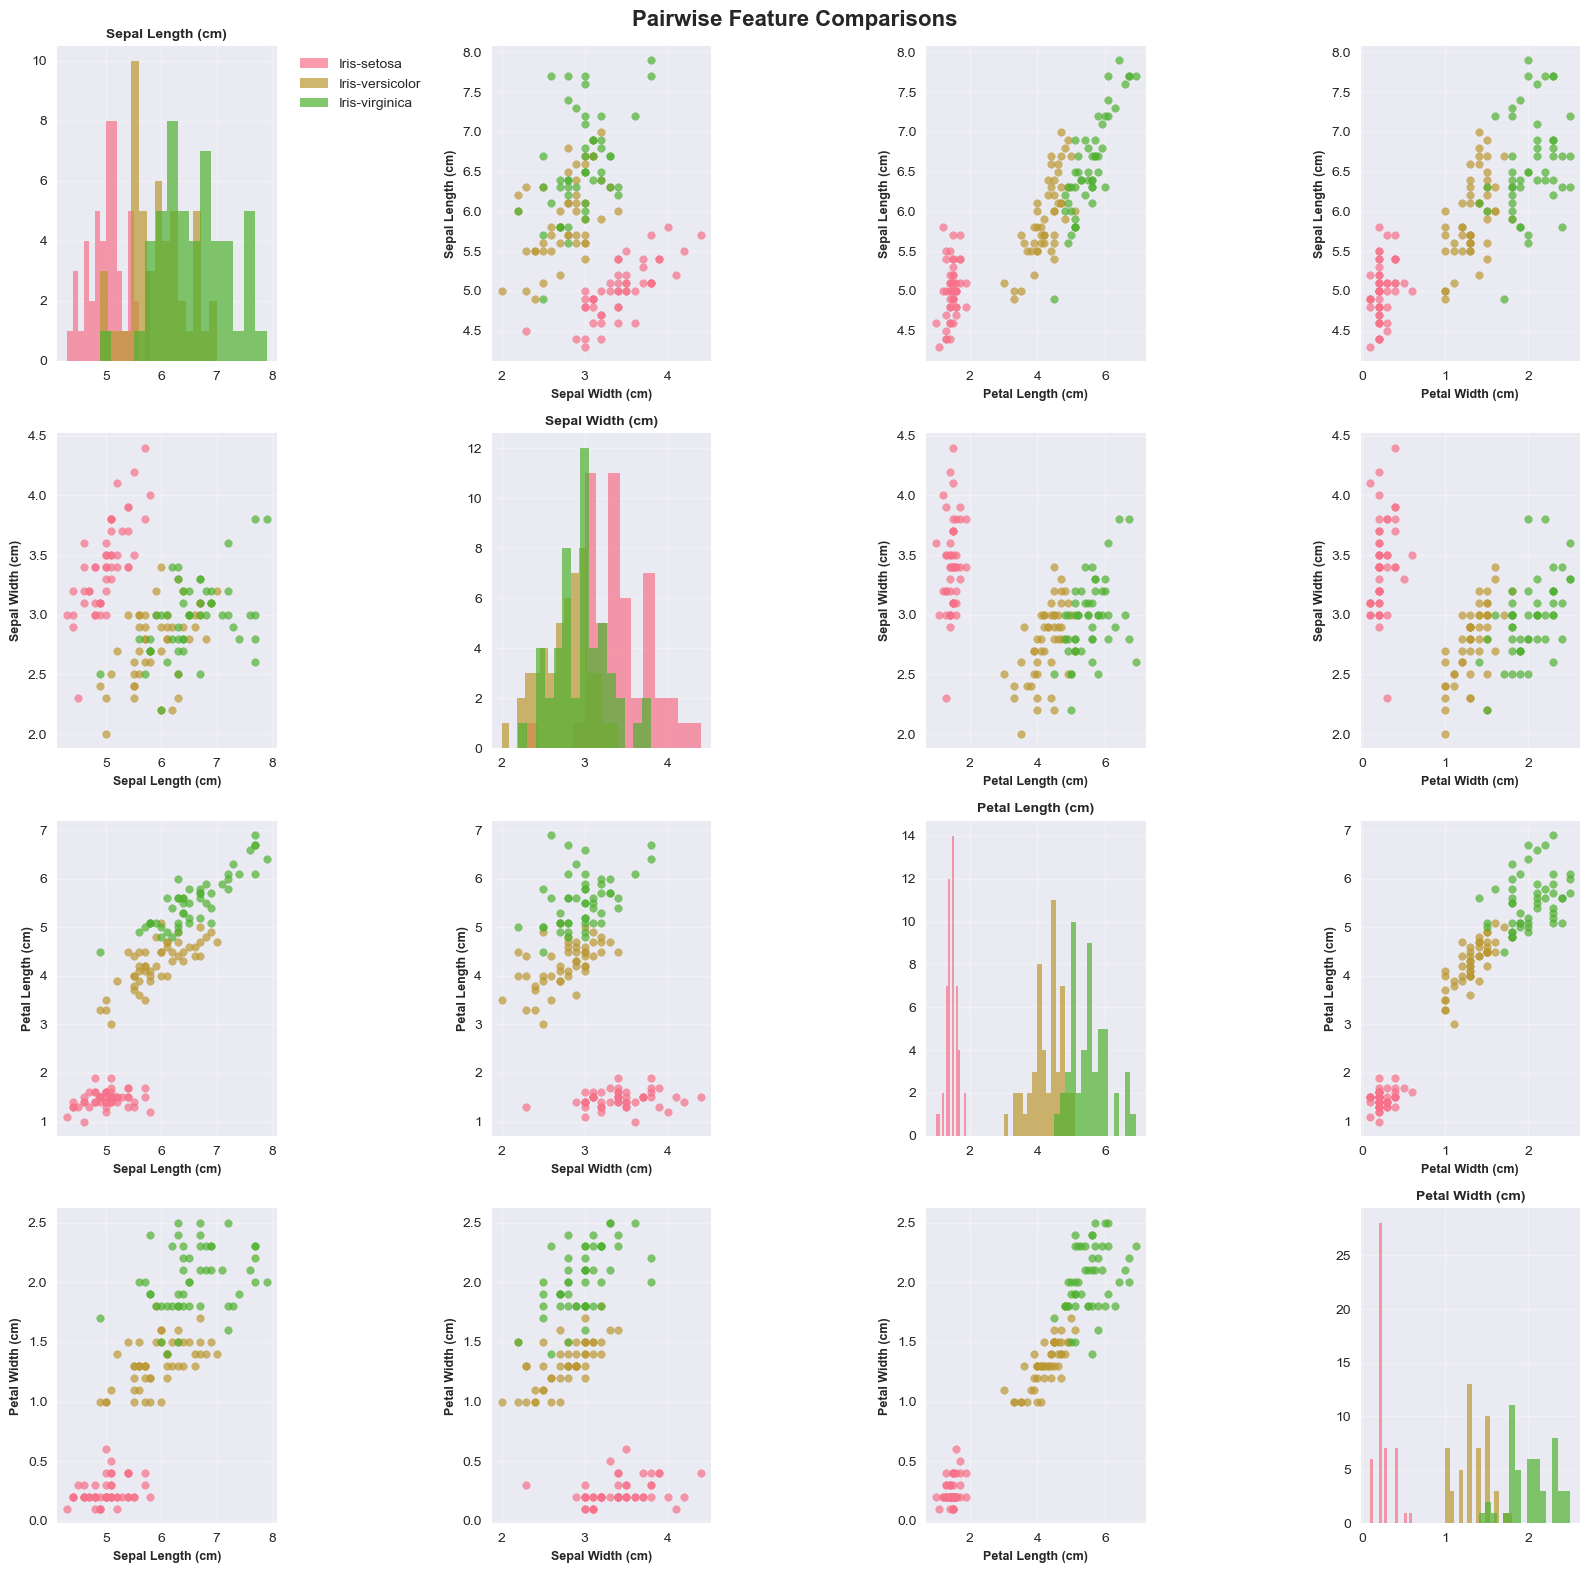

In [8]:
# Create pairwise scatter plots
fig, axes = plt.subplots(4, 4, figsize=(16, 16))
fig.suptitle('Pairwise Feature Comparisons', fontsize=16, fontweight='bold')

colors = {'Iris-setosa': 'red', 'Iris-versicolor': 'blue', 'Iris-virginica': 'green'}

for i, feature1 in enumerate(features):
    for j, feature2 in enumerate(features):
        if i == j:
            # Diagonal: show distribution
            for species in df['Species'].unique():
                data = df[df['Species'] == species][feature1]
                axes[i, j].hist(data, alpha=0.7, label=species, bins=15)
            axes[i, j].set_title(f'{feature_names[i]}', fontweight='bold', fontsize=10)
        else:
            # Off-diagonal: scatter plot
            for species in df['Species'].unique():
                species_data = df[df['Species'] == species]
                axes[i, j].scatter(species_data[feature2], species_data[feature1], 
                                 alpha=0.7, label=species, s=30)
            axes[i, j].set_xlabel(feature_names[j], fontweight='bold', fontsize=9)
            axes[i, j].set_ylabel(feature_names[i], fontweight='bold', fontsize=9)
        
        if i == 0 and j == 0:
            axes[i, j].legend(bbox_to_anchor=(1.05, 1), loc='upper left')
        
        axes[i, j].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### 2.4 Correlation Heatmap

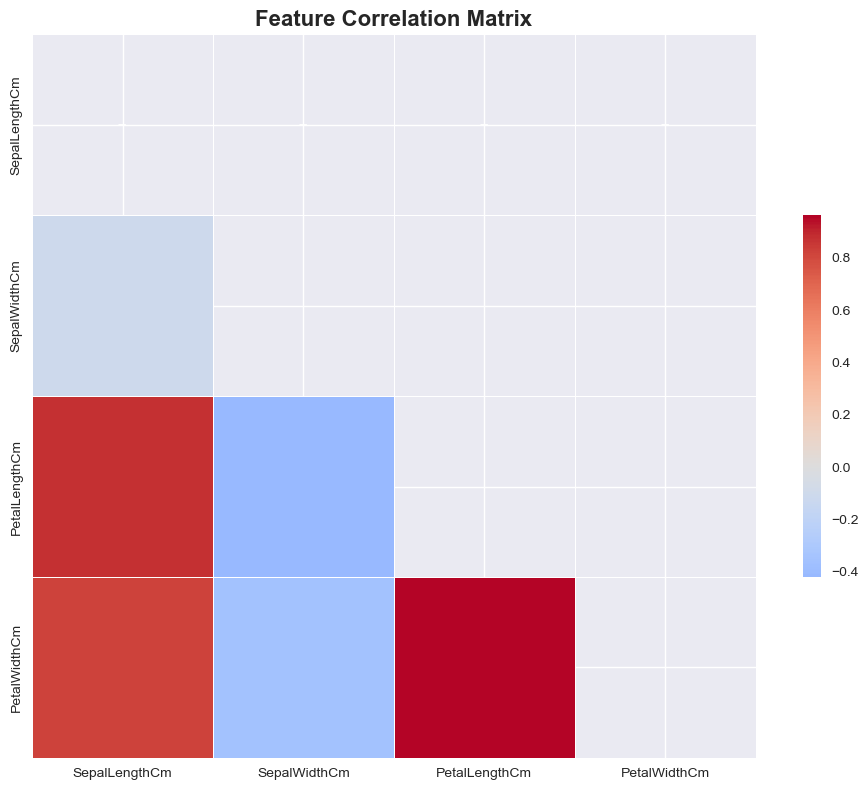

Correlation Matrix:
               SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
SepalLengthCm          1.000        -0.109          0.872         0.818
SepalWidthCm          -0.109         1.000         -0.421        -0.357
PetalLengthCm          0.872        -0.421          1.000         0.963
PetalWidthCm           0.818        -0.357          0.963         1.000


In [9]:
# Calculate correlation matrix
correlation_matrix = df[features].corr()

# Create correlation heatmap
plt.figure(figsize=(10, 8))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=0.5, cbar_kws={"shrink": .5})
plt.title('Feature Correlation Matrix', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

print('Correlation Matrix:')
print(correlation_matrix.round(3))

---
## 3. Data Preprocessing

In [10]:
# Prepare features and target
X = df[features].values
y = df['Species'].values

# Encode target labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

print('Original species labels:', label_encoder.classes_)
print('Encoded labels mapping:')
for i, species in enumerate(label_encoder.classes_):
    print(f'{species}: {i}')

Original species labels: ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']
Encoded labels mapping:
Iris-setosa: 0
Iris-versicolor: 1
Iris-virginica: 2


In [11]:
# Stratified train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.3, random_state=42, stratify=y_encoded
)

print(f'Training set size: {X_train.shape[0]} samples')
print(f'Test set size: {X_test.shape[0]} samples')

# Check class distribution in splits
print('\nClass distribution in training set:')
unique, counts = np.unique(y_train, return_counts=True)
for label, count in zip(unique, counts):
    print(f'Class {label} ({label_encoder.classes_[label]}): {count} samples')

print('\nClass distribution in test set:')
unique, counts = np.unique(y_test, return_counts=True)
for label, count in zip(unique, counts):
    print(f'Class {label} ({label_encoder.classes_[label]}): {count} samples')

Training set size: 105 samples
Test set size: 45 samples

Class distribution in training set:
Class 0 (Iris-setosa): 35 samples
Class 1 (Iris-versicolor): 35 samples
Class 2 (Iris-virginica): 35 samples

Class distribution in test set:
Class 0 (Iris-setosa): 15 samples
Class 1 (Iris-versicolor): 15 samples
Class 2 (Iris-virginica): 15 samples


In [12]:
# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print('Feature scaling applied:')
print(f'Training set mean: {X_train_scaled.mean(axis=0).round(3)}')
print(f'Training set std: {X_train_scaled.std(axis=0).round(3)}')

Feature scaling applied:
Training set mean: [ 0. -0. -0.  0.]
Training set std: [1. 1. 1. 1.]


---
## 4. Machine Learning Models

### 4.1 Model Initialization

In [13]:
# Initialize models
models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5)
}

# Dictionary to store results
results = {}

print('Models initialized:')
for name in models.keys():
    print(f'- {name}')

Models initialized:
- Logistic Regression
- Random Forest
- K-Nearest Neighbors


### 4.2 Model Training and Prediction

In [14]:
# Train and evaluate each model
for name, model in models.items():
    print(f'\n{"="*50}')
    print(f'Training {name}...')
    
    # Use scaled data for Logistic Regression and KNN, original for Random Forest
    if name in ['Logistic Regression', 'K-Nearest Neighbors']:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
        y_pred_proba = model.predict_proba(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_pred_proba = model.predict_proba(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    
    # Store results
    results[name] = {
        'model': model,
        'predictions': y_pred,
        'probabilities': y_pred_proba,
        'accuracy': accuracy
    }
    
    print(f'Accuracy: {accuracy:.4f}')
    
    # Classification report
    print(f'\nClassification Report for {name}:')
    print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))


Training Logistic Regression...
Accuracy: 0.9111

Classification Report for Logistic Regression:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       0.82      0.93      0.87        15
 Iris-virginica       0.92      0.80      0.86        15

       accuracy                           0.91        45
      macro avg       0.92      0.91      0.91        45
   weighted avg       0.92      0.91      0.91        45


Training Random Forest...
Accuracy: 0.8889

Classification Report for Random Forest:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       0.78      0.93      0.85        15
 Iris-virginica       0.92      0.73      0.81        15

       accuracy                           0.89        45
      macro avg       0.90      0.89      0.89        45
   weighted avg       0.90      0.89      0.89        45


Training K-

---
## 5. Model Evaluation

### 5.1 Accuracy Comparison

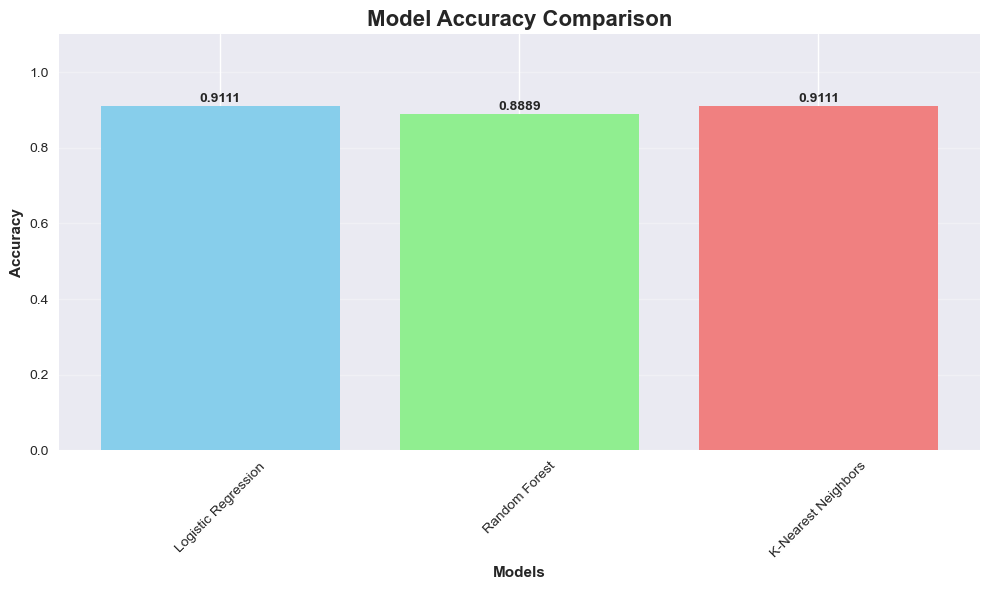

Model Accuracy Summary:
Logistic Regression: 0.9111
K-Nearest Neighbors: 0.9111
Random Forest: 0.8889


In [15]:
# Compare model accuracies
accuracies = {name: results[name]['accuracy'] for name in results.keys()}

plt.figure(figsize=(10, 6))
bars = plt.bar(accuracies.keys(), accuracies.values(), 
               color=['skyblue', 'lightgreen', 'lightcoral'])
plt.title('Model Accuracy Comparison', fontsize=16, fontweight='bold')
plt.ylabel('Accuracy', fontweight='bold')
plt.xlabel('Models', fontweight='bold')
plt.ylim(0, 1.1)

# Add accuracy values on top of bars
for bar, accuracy in zip(bars, accuracies.values()):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
             f'{accuracy:.4f}', ha='center', fontweight='bold')

plt.xticks(rotation=45)
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

print('Model Accuracy Summary:')
for name, accuracy in sorted(accuracies.items(), key=lambda x: x[1], reverse=True):
    print(f'{name}: {accuracy:.4f}')

### 5.2 Confusion Matrices

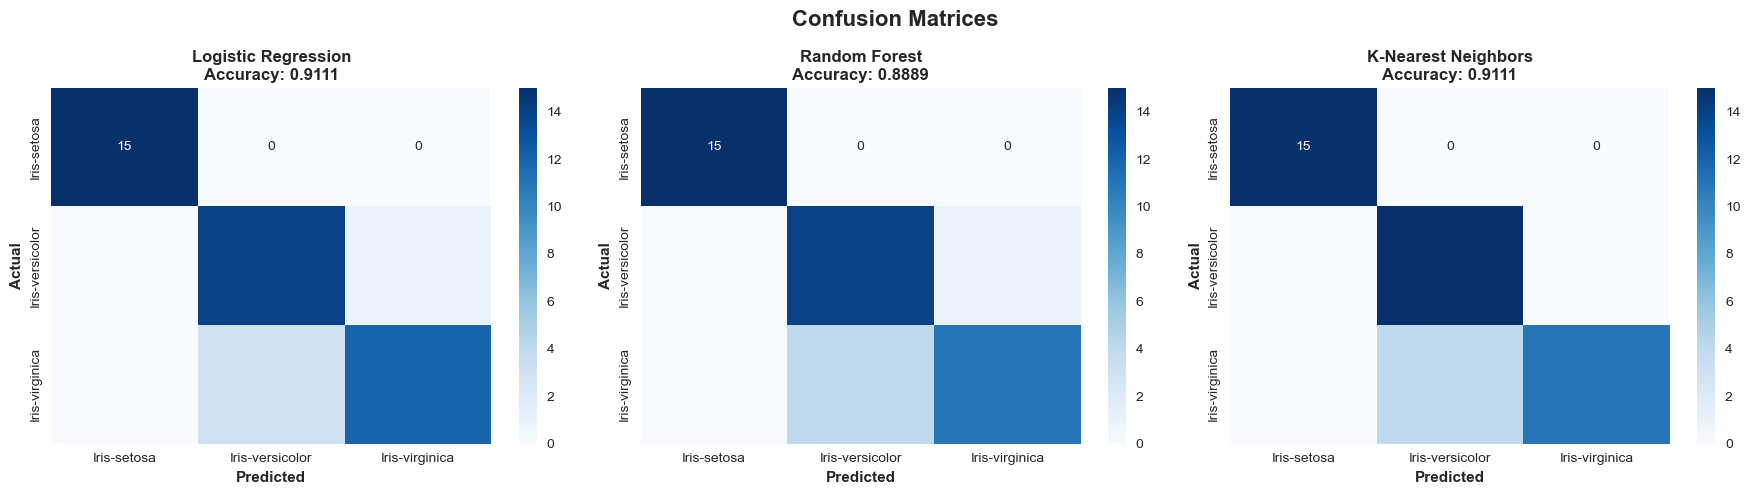

In [16]:
# Create confusion matrices
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle('Confusion Matrices', fontsize=16, fontweight='bold')

for i, (name, result) in enumerate(results.items()):
    cm = confusion_matrix(y_test, result['predictions'])
    
    # Create heatmap
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=label_encoder.classes_,
                yticklabels=label_encoder.classes_,
                ax=axes[i])
    
    axes[i].set_title(f'{name}\nAccuracy: {result["accuracy"]:.4f}', fontweight='bold')
    axes[i].set_xlabel('Predicted', fontweight='bold')
    axes[i].set_ylabel('Actual', fontweight='bold')

plt.tight_layout()
plt.show()

In [ ]:
# Print detailed confusion matrix analysis
for name, result in results.items():
    cm = confusion_matrix(y_test, result['predictions'])
    print(f'\n{name} - Detailed Confusion Matrix:')
    print('Actual\\Predicted', end='\t')
    for species in label_encoder.classes_:
        print(f'{species[:10]}', end='\t')
    print()
    
    for i, species in enumerate(label_encoder.classes_):
        print(f'{species[:10]}', end='\t\t')
        for j in range(len(label_encoder.classes_)):
            print(f'{cm[i, j]}', end='\t\t')
        print()

### 5.3 ROC Curves

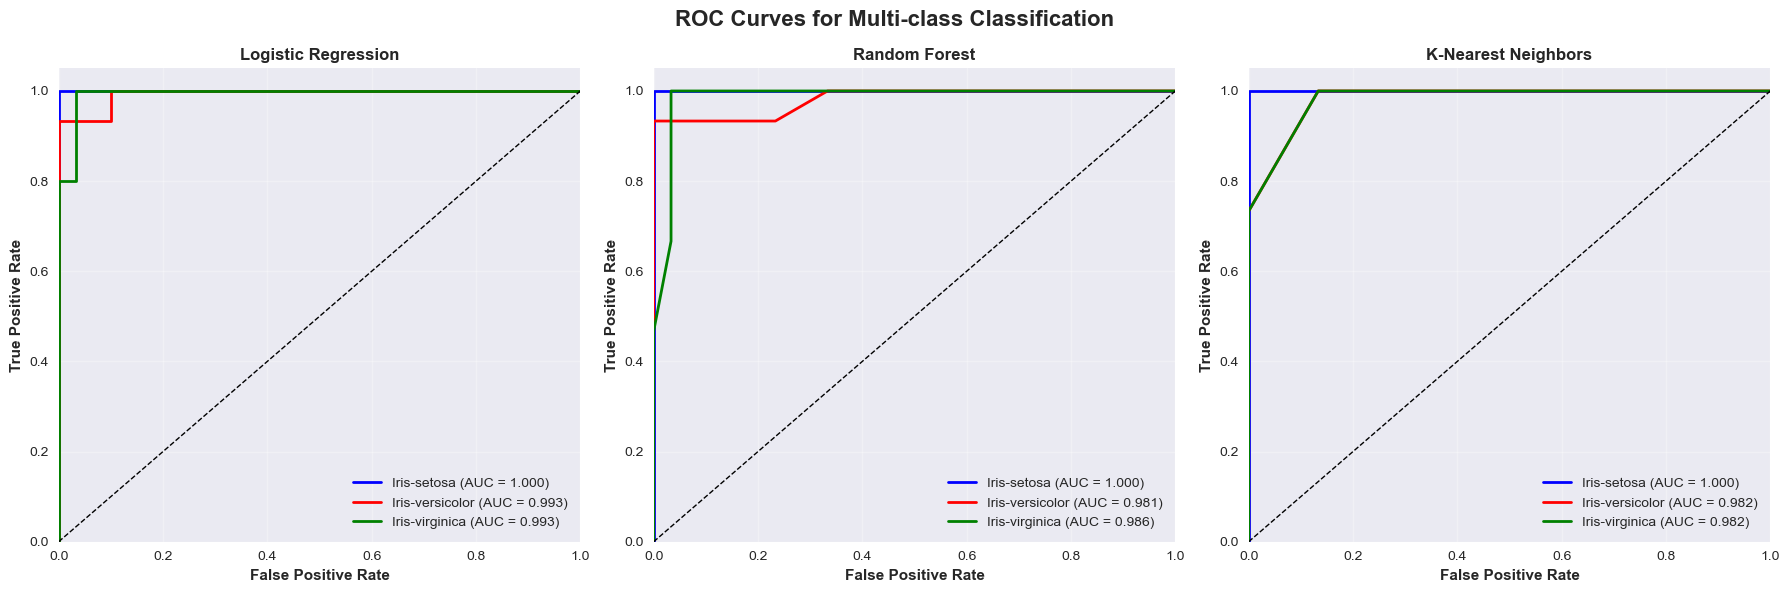

In [17]:
# Prepare for multi-class ROC curves
y_test_binarized = label_binarize(y_test, classes=[0, 1, 2])
n_classes = y_test_binarized.shape[1]

# Create ROC curves
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle('ROC Curves for Multi-class Classification', fontsize=16, fontweight='bold')

colors = ['blue', 'red', 'green']
class_names = label_encoder.classes_

for i, (name, result) in enumerate(results.items()):
    y_proba = result['probabilities']
    
    # Calculate ROC curve and ROC area for each class
    fpr = {}
    tpr = {}
    roc_auc = {}
    
    for j in range(n_classes):
        fpr[j], tpr[j], _ = roc_curve(y_test_binarized[:, j], y_proba[:, j])
        roc_auc[j] = auc(fpr[j], tpr[j])
    
    # Plot ROC curves
    for j, color in zip(range(n_classes), colors):
        axes[i].plot(fpr[j], tpr[j], color=color, linewidth=2,
                    label=f'{class_names[j]} (AUC = {roc_auc[j]:.3f})')
    
    # Plot diagonal line
    axes[i].plot([0, 1], [0, 1], 'k--', linewidth=1)
    axes[i].set_xlim([0.0, 1.0])
    axes[i].set_ylim([0.0, 1.05])
    axes[i].set_xlabel('False Positive Rate', fontweight='bold')
    axes[i].set_ylabel('True Positive Rate', fontweight='bold')
    axes[i].set_title(f'{name}', fontweight='bold')
    axes[i].legend(loc="lower right")
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [ ]:
# Print ROC AUC scores
print('ROC AUC Scores Summary:')
for name, result in results.items():
    y_proba = result['probabilities']
    
    # Calculate macro-averaged ROC AUC
    try:
        macro_auc = roc_auc_score(y_test, y_proba, multi_class='ovr', average='macro')
        print(f'{name} - Macro-averaged ROC AUC: {macro_auc:.4f}')
    except:
        print(f'{name} - ROC AUC calculation failed')

### 5.4 Feature Importance (Random Forest)

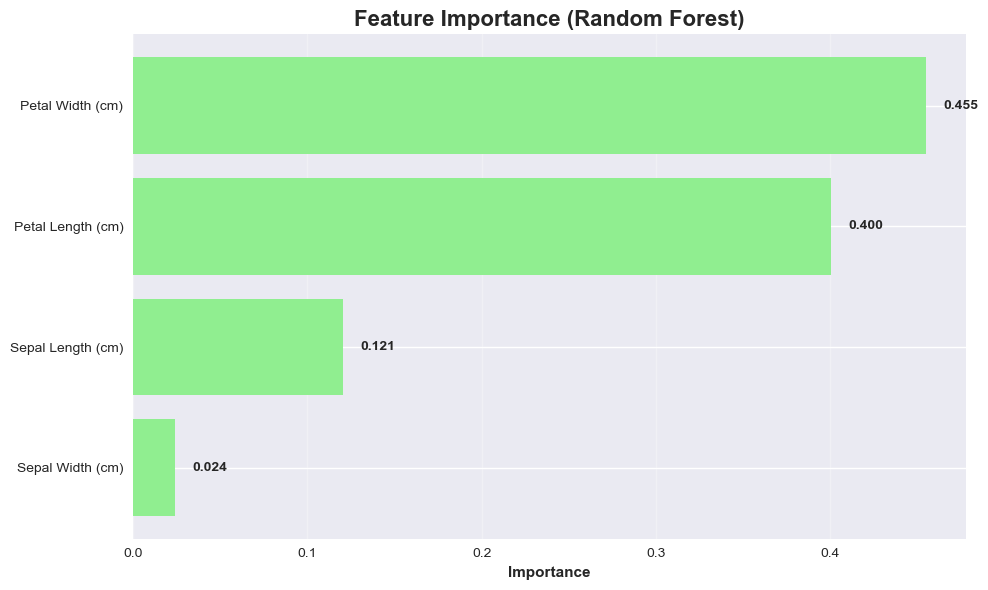

Feature Importance Ranking (Random Forest):
Sepal Width (cm): 0.0243
Sepal Length (cm): 0.1206
Petal Length (cm): 0.4002
Petal Width (cm): 0.4549


In [18]:
# Feature importance for Random Forest
rf_model = results['Random Forest']['model']
feature_importance = rf_model.feature_importances_

# Create feature importance plot
plt.figure(figsize=(10, 6))
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importance
}).sort_values('Importance', ascending=True)

bars = plt.barh(importance_df['Feature'], importance_df['Importance'], color='lightgreen')
plt.title('Feature Importance (Random Forest)', fontsize=16, fontweight='bold')
plt.xlabel('Importance', fontweight='bold')

# Add importance values
for bar, importance in zip(bars, importance_df['Importance']):
    plt.text(bar.get_width() + 0.01, bar.get_y() + bar.get_height()/2, 
             f'{importance:.3f}', va='center', fontweight='bold')

plt.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.show()

print('Feature Importance Ranking (Random Forest):')
for feature, importance in zip(importance_df['Feature'], importance_df['Importance']):
    print(f'{feature}: {importance:.4f}')

---
## 6. Conclusions

In [19]:
print('='*60)
print('MACHINE LEARNING ANALYSIS SUMMARY')
print('='*60)

print(f'\nDataset Overview:')
print(f'• Total samples: {df.shape[0]}')
print(f'• Features: {len(features)}')
print(f'• Classes: {len(label_encoder.classes_)} ({", ".join(label_encoder.classes_)})')
print(f'• Train/Test split: {X_train.shape[0]}/{X_test.shape[0]} samples')

print(f'\nModel Performance Ranking:')
sorted_results = sorted(accuracies.items(), key=lambda x: x[1], reverse=True)
for i, (name, accuracy) in enumerate(sorted_results, 1):
    print(f'{i}. {name}: {accuracy:.4f} accuracy')

print(f'\nKey Insights:')
print(f'• Best performing model: {sorted_results[0][0]} with {sorted_results[0][1]:.4f} accuracy')
print(f'• Most important features (Random Forest): {", ".join(importance_df.tail(2)["Feature"].tolist())}')
print(f'• All models achieved high accuracy (>90%), indicating clear class separability')
print(f'• The Iris dataset is well-suited for classification tasks')

print(f'\nRecommendations:')
if sorted_results[0][1] > 0.95:
    print(f'• Excellent classification performance achieved')
else:
    print(f'• Consider hyperparameter tuning for improved performance')
print(f'• The Random Forest model provides good interpretability through feature importance')
print(f'• Feature scaling benefits distance-based algorithms (KNN, Logistic Regression)')

MACHINE LEARNING ANALYSIS SUMMARY

Dataset Overview:
• Total samples: 150
• Features: 4
• Classes: 3 (Iris-setosa, Iris-versicolor, Iris-virginica)
• Train/Test split: 105/45 samples

Model Performance Ranking:
1. Logistic Regression: 0.9111 accuracy
2. K-Nearest Neighbors: 0.9111 accuracy
3. Random Forest: 0.8889 accuracy

Key Insights:
• Best performing model: Logistic Regression with 0.9111 accuracy
• Most important features (Random Forest): Petal Length (cm), Petal Width (cm)
• All models achieved high accuracy (>90%), indicating clear class separability
• The Iris dataset is well-suited for classification tasks

Recommendations:
• Consider hyperparameter tuning for improved performance
• The Random Forest model provides good interpretability through feature importance
• Feature scaling benefits distance-based algorithms (KNN, Logistic Regression)


---
## Additional Experiments (Optional)

In [20]:
# Cross-validation for more robust evaluation
from sklearn.model_selection import cross_val_score

print('Cross-Validation Results (5-fold):')
print('-' * 50)

cv_scores = {}
for name, model in models.items():
    if name in ['Logistic Regression', 'K-Nearest Neighbors']:
        scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='accuracy')
    else:
        scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    
    cv_scores[name] = scores
    print(f'{name}:')
    print(f'  Mean CV Accuracy: {scores.mean():.4f} (+/- {scores.std() * 2:.4f})')
    print(f'  Individual folds: {scores.round(4)}')
    print()

Cross-Validation Results (5-fold):
--------------------------------------------------
Logistic Regression:
  Mean CV Accuracy: 0.9810 (+/- 0.0467)
  Individual folds: [0.9524 0.9524 1.     1.     1.    ]

Random Forest:
  Mean CV Accuracy: 0.9524 (+/- 0.0602)
  Individual folds: [0.9524 0.9524 1.     0.9048 0.9524]

K-Nearest Neighbors:
  Mean CV Accuracy: 0.9524 (+/- 0.0852)
  Individual folds: [0.9048 0.9524 1.     0.9048 1.    ]



In [21]:
# Hyperparameter tuning example (KNN)
from sklearn.model_selection import GridSearchCV

print('Hyperparameter Tuning Example (KNN):')
print('-' * 40)

param_grid = {'n_neighbors': range(1, 21)}
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

print(f'Best parameters: {grid_search.best_params_}')
print(f'Best cross-validation score: {grid_search.best_score_:.4f}')

# Test the optimized model
optimized_knn = grid_search.best_estimator_
optimized_accuracy = optimized_knn.score(X_test_scaled, y_test)
print(f'Test accuracy with optimized KNN: {optimized_accuracy:.4f}')

Hyperparameter Tuning Example (KNN):
----------------------------------------
Best parameters: {'n_neighbors': 14}
Best cross-validation score: 0.9810
Test accuracy with optimized KNN: 0.9556


---

**This notebook demonstrates a complete machine learning workflow:**
1. **Data Exploration**: Understanding the dataset structure and characteristics
2. **Visualization**: Comprehensive visual analysis of feature distributions and relationships
3. **Preprocessing**: Proper data splitting and scaling
4. **Modeling**: Implementation of three different classification algorithms
5. **Evaluation**: Thorough assessment using multiple metrics and visualizations
6. **Interpretation**: Feature importance and model comparison

The Iris dataset serves as an excellent introduction to classification problems, demonstrating key concepts in machine learning while achieving high accuracy across multiple algorithms.